In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
import sys
import time
sys.path.append('../..')
import omama as O

Populating the interactive namespace from numpy and matplotlib


In [2]:
def determine_threshold(mean_intensities):
    sorted_intensities = sorted(mean_intensities)
    lower_quartile = sorted_intensities[:len(sorted_intensities) // 16]
    threshold = np.median(lower_quartile)
    return threshold

In [32]:
file_path = "/raid/mpsych/OMAMA/DATA/data/2d/2.25.100033923748954774204291682102484606744.npz"

In [33]:
data = np.load(file_path)

In [34]:
pixel_array = data['data'] 

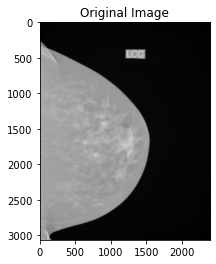

In [35]:
plt.imshow(pixel_array, cmap='gray')
plt.title('Original Image')
plt.show()

In [39]:
height, width = pixel_array.shape
longest_dim = 'height' if height > width else 'width'

In [40]:
N = 256
slices = []

if longest_dim == 'height':
    slice_height = height // N
    for i in range(N):
        slice_start = i * slice_height
        slice_end = (i+1) * slice_height
        slices.append(pixel_array[slice_start:slice_end, :])
else:
    slice_width = width // N
    for i in range(N):
        slice_start = i * slice_width
        slice_end = (i+1) * slice_width
        slices.append(pixel_array[:, slice_start:slice_end])

In [41]:
mean_intensities = [np.mean(s) for s in slices]

In [42]:
mean_intensities

[37.16237563605985,
 43.11418698260803,
 47.71618440039493,
 51.04583428267639,
 53.67851446798815,
 55.51875901875902,
 56.91049593681173,
 58.0990734411787,
 59.16302118933698,
 60.23741171109592,
 61.211931343510294,
 62.32266271739956,
 63.29627098048151,
 64.33815599605073,
 65.29205589731906,
 66.26186678818257,
 67.20896939317991,
 68.07731449836713,
 68.90798967114756,
 69.81256170729856,
 70.67205893521682,
 71.51537935748462,
 72.17669172932331,
 73.18910913647755,
 78.20319738740791,
 90.37723095617832,
 102.6632110579479,
 115.06747930432141,
 129.13518645097594,
 138.98807625123413,
 148.42853345484926,
 164.6866408445356,
 181.86492747019062,
 205.00330371383004,
 266.56041619199516,
 478.44395078605606,
 596.429292929293,
 631.1698944330524,
 647.8960659223817,
 664.5857066909698,
 685.9036606668186,
 714.7508923824713,
 743.1455532771322,
 772.7106022632338,
 801.5151894888737,
 794.1051492367282,
 672.3348902559429,
 554.3033340928077,
 563.4550011392116,
 584.54902407

In [43]:
threshold = determine_threshold(mean_intensities)

# Keep slices that have a mean intensity above the threshold
slices_to_keep = [slices[i] for i, mean_intensity in enumerate(mean_intensities) if mean_intensity > threshold]
print(threshold)
print(len(slices_to_keep))

58.631047315257845
248


In [44]:
if longest_dim == 'height':
    cropped_img_array = np.vstack(slices_to_keep)
else:
    cropped_img_array = np.hstack(slices_to_keep)


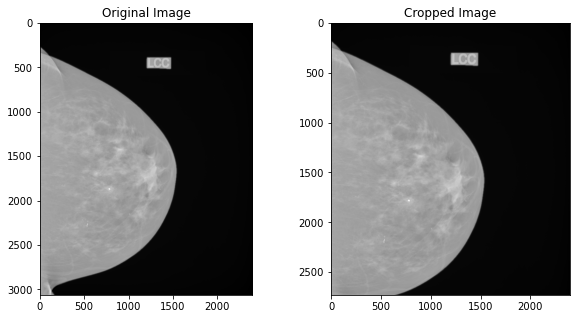

In [45]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(pixel_array, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cropped_img_array, cmap='gray')
plt.title('Cropped Image')
plt.show()


In [46]:
cropped_img_array.shape

(2728, 2394)

In [18]:
file_path = "/raid/mpsych/OMAMA/DATA/data/test_2d/2.25.129616891741421240678207955334132509279.npz"

In [19]:
data2 = np.load(file_path)

In [20]:
pixel_array2 = data2['data'] 

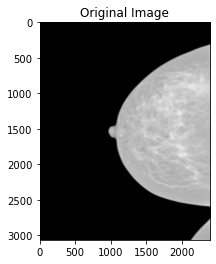

In [21]:
plt.imshow(pixel_array2, cmap='gray')
plt.title('Original Image')
plt.show()

In [25]:
height, width = pixel_array2.shape
longest_dim = 'height' if height > width else 'width'

In [26]:
N = 256
slices = []

if longest_dim == 'height':
    slice_height = height // N
    for i in range(N):
        slice_start = i * slice_height
        slice_end = (i+1) * slice_height
        slices.append(pixel_array2[slice_start:slice_end, :])
else:
    slice_width = width // N
    for i in range(N):
        slice_start = i * slice_width
        slice_end = (i+1) * slice_width
        slices.append(pixel_array2[:, slice_start:slice_end])


In [27]:
mean_intensities = [np.mean(s) for s in slices]
mean_intensities

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.177109440267335,
 14.667122351332878,
 46.222032353611304,
 83.61859193438141,
 123.36059846586163,
 157.62770562770564,
 188.79835953520163,
 217.14578111946534,
 244.78586618060302,
 271.3674337358548,
 293.9648363332574,
 323.2772461456672,
 349.77838535733275,
 377.1381484013063,
 405.07507404875827,
 427.9323308270677,
 448.7053239158502,
 472.2037290195185,
 494.68622313359157,
 518.2848029163819,
 539.0830105566947,
 559.7156527682844,
 580.6524265208476,
 601.2337662337662,
 622.0223285486443,
 643.025138604086,
 666.4485456064403,
 691.2683982683983,
 703.86109212425,
 716.220931115668,
 739.6570213412318,
 760.0601124022177,
 773.1356421356421,
 796.860066833751,
 814.8402445507709,
 827.0184932027038,
 856.2096908939014,
 895.1670464038885,
 916.0173539910382,
 941.0701374648743,
 966.6968937495253,
 981.50288600

In [28]:
threshold = determine_threshold(mean_intensities)

# Keep slices that have a mean intensity above the threshold
slices_to_keep = [slices[i] for i, mean_intensity in enumerate(mean_intensities) if mean_intensity > threshold]
print(threshold)
print(len(slices_to_keep))

0.0
217


In [29]:
if longest_dim == 'height':
    cropped_img_array = np.vstack(slices_to_keep)
else:
    cropped_img_array = np.hstack(slices_to_keep)

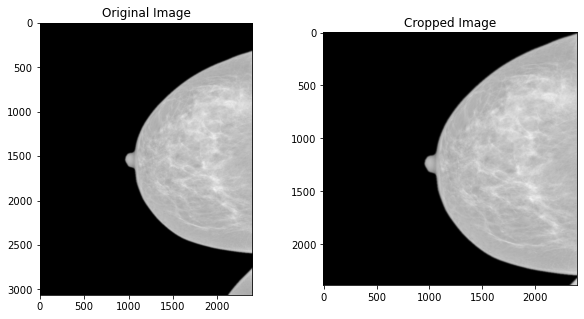

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
plt.imshow(pixel_array2, cmap='gray')
plt.title('Original Image')
plt.subplot(1, 2, 2)
plt.imshow(cropped_img_array, cmap='gray')
plt.title('Cropped Image')
plt.show()


In [31]:
cropped_img_array.shape

(2387, 2394)